In [1]:
#EDA Bulgaria car accidents

# Steps to take: 
# - Visualize the problem
# - Hypothesis testing to see statistical significance of the differences

import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from textblob import TextBlob


In [2]:
df = pd.read_csv('2020vs2021.csv')
df_month = pd.read_csv('ByMonth.csv')

In [3]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %"
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Области                 29 non-null     object 
 1   ПТП, бр., 2021 г.       29 non-null     int64  
 2   Загинали, бр., 2021 г.  29 non-null     int64  
 3   Ранени, бр., 2021 г.    29 non-null     int64  
 4   ПТП, бр., 2020 г.       29 non-null     int64  
 5   Загинали, бр., 2020 г.  29 non-null     int64  
 6   Ранени, бр., 2020 г.    29 non-null     int64  
 7   Разлика ПТП, бр.        29 non-null     int64  
 8   Разлика ПТП, %          28 non-null     float64
 9   Разлика загинали, бр.   29 non-null     int64  
 10  Разлика загинали, %     28 non-null     float64
 11  Разлика ранени, бр.     29 non-null     int64  
 12  Разлика ранени, %       28 non-null     float64
dtypes: float64(3), int64(9), object(1)
memory usage: 3.1+ KB


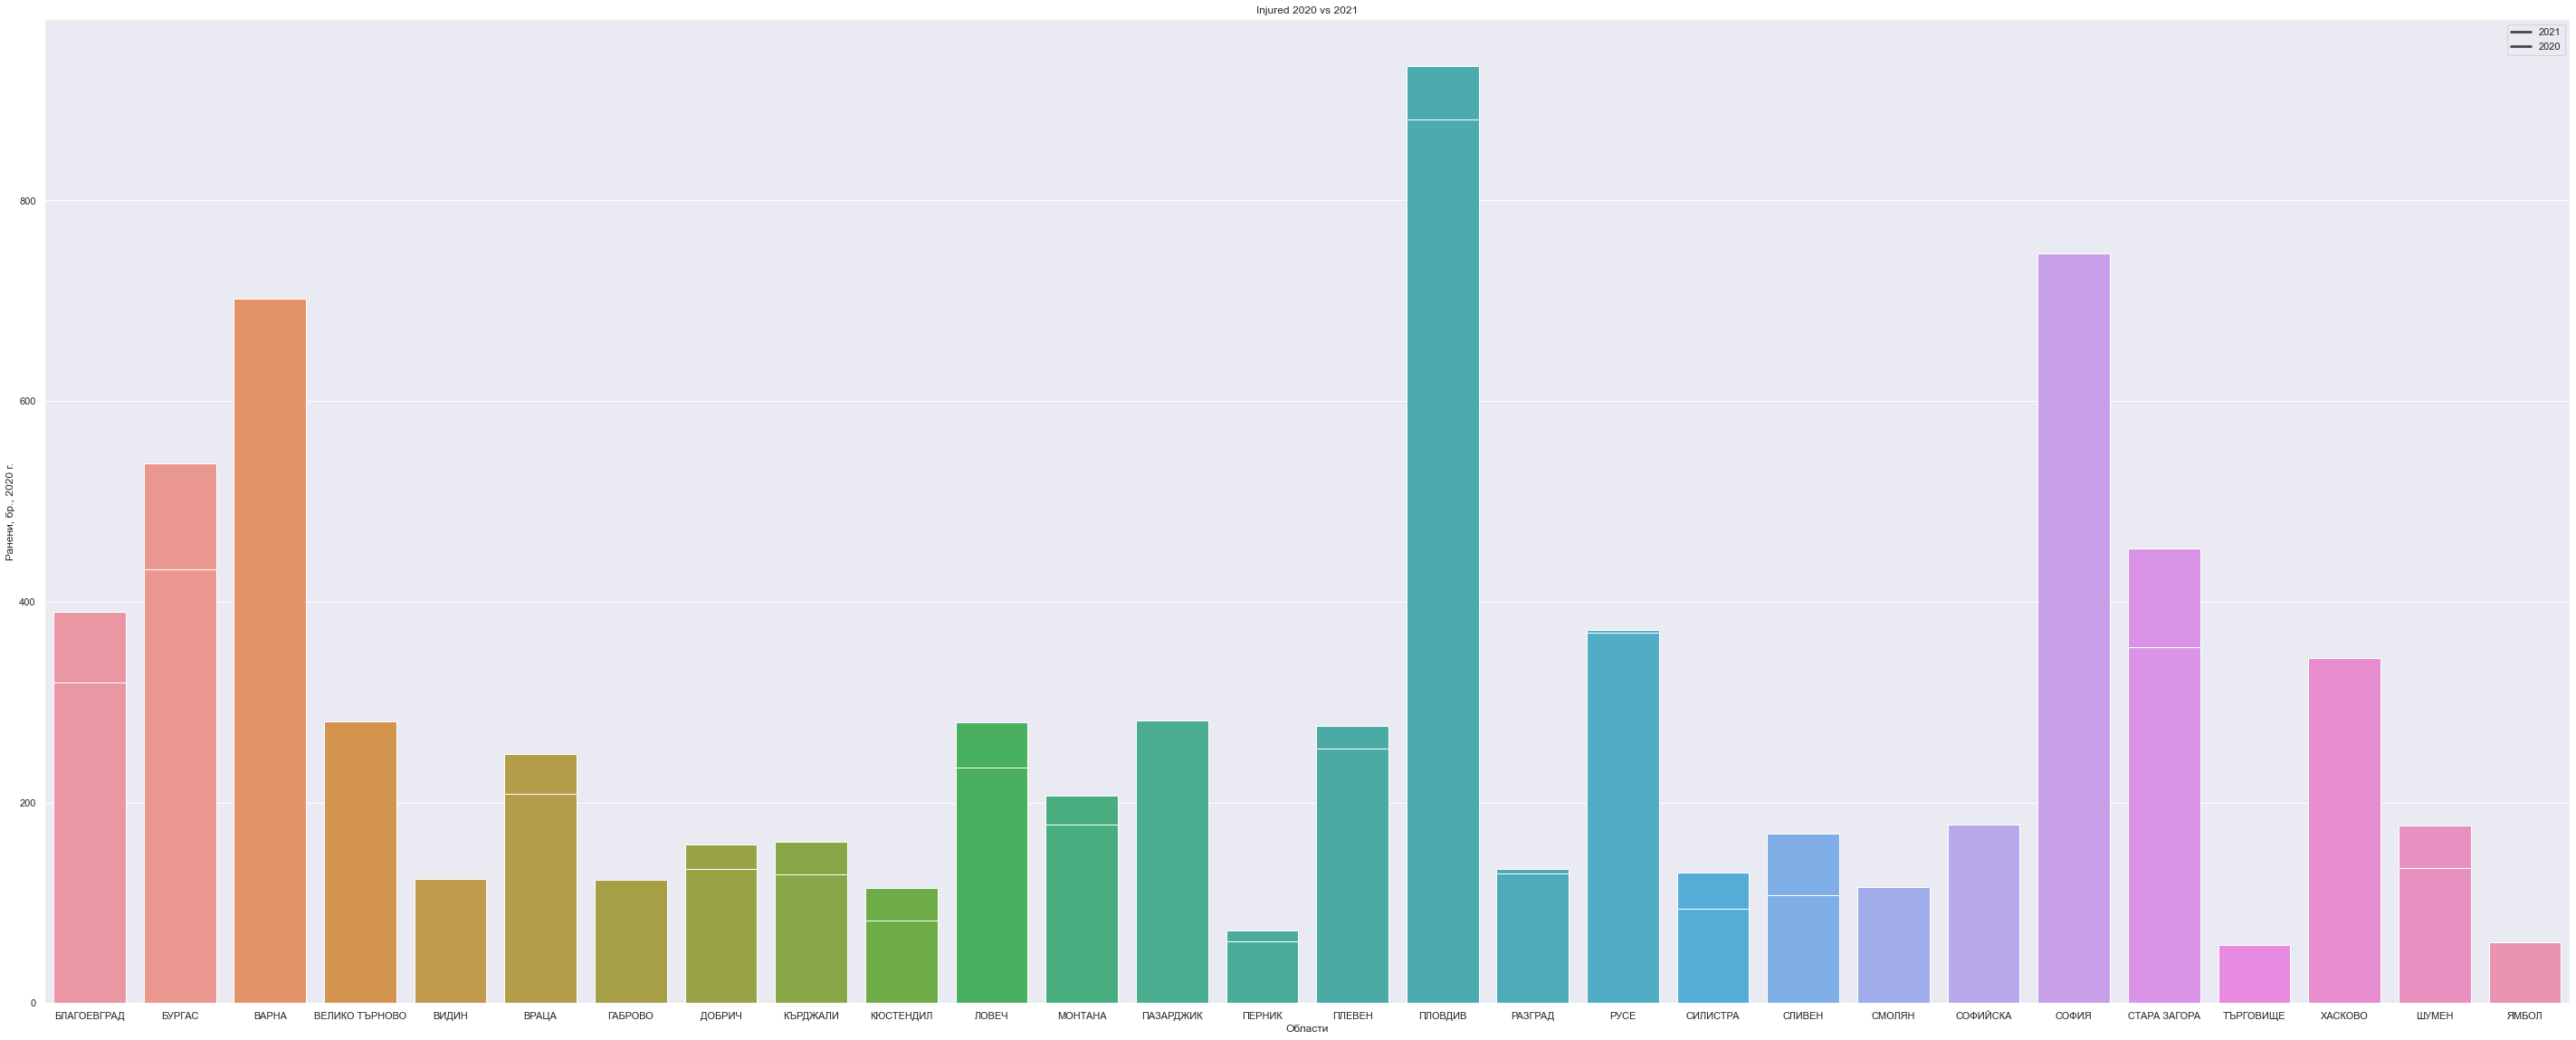

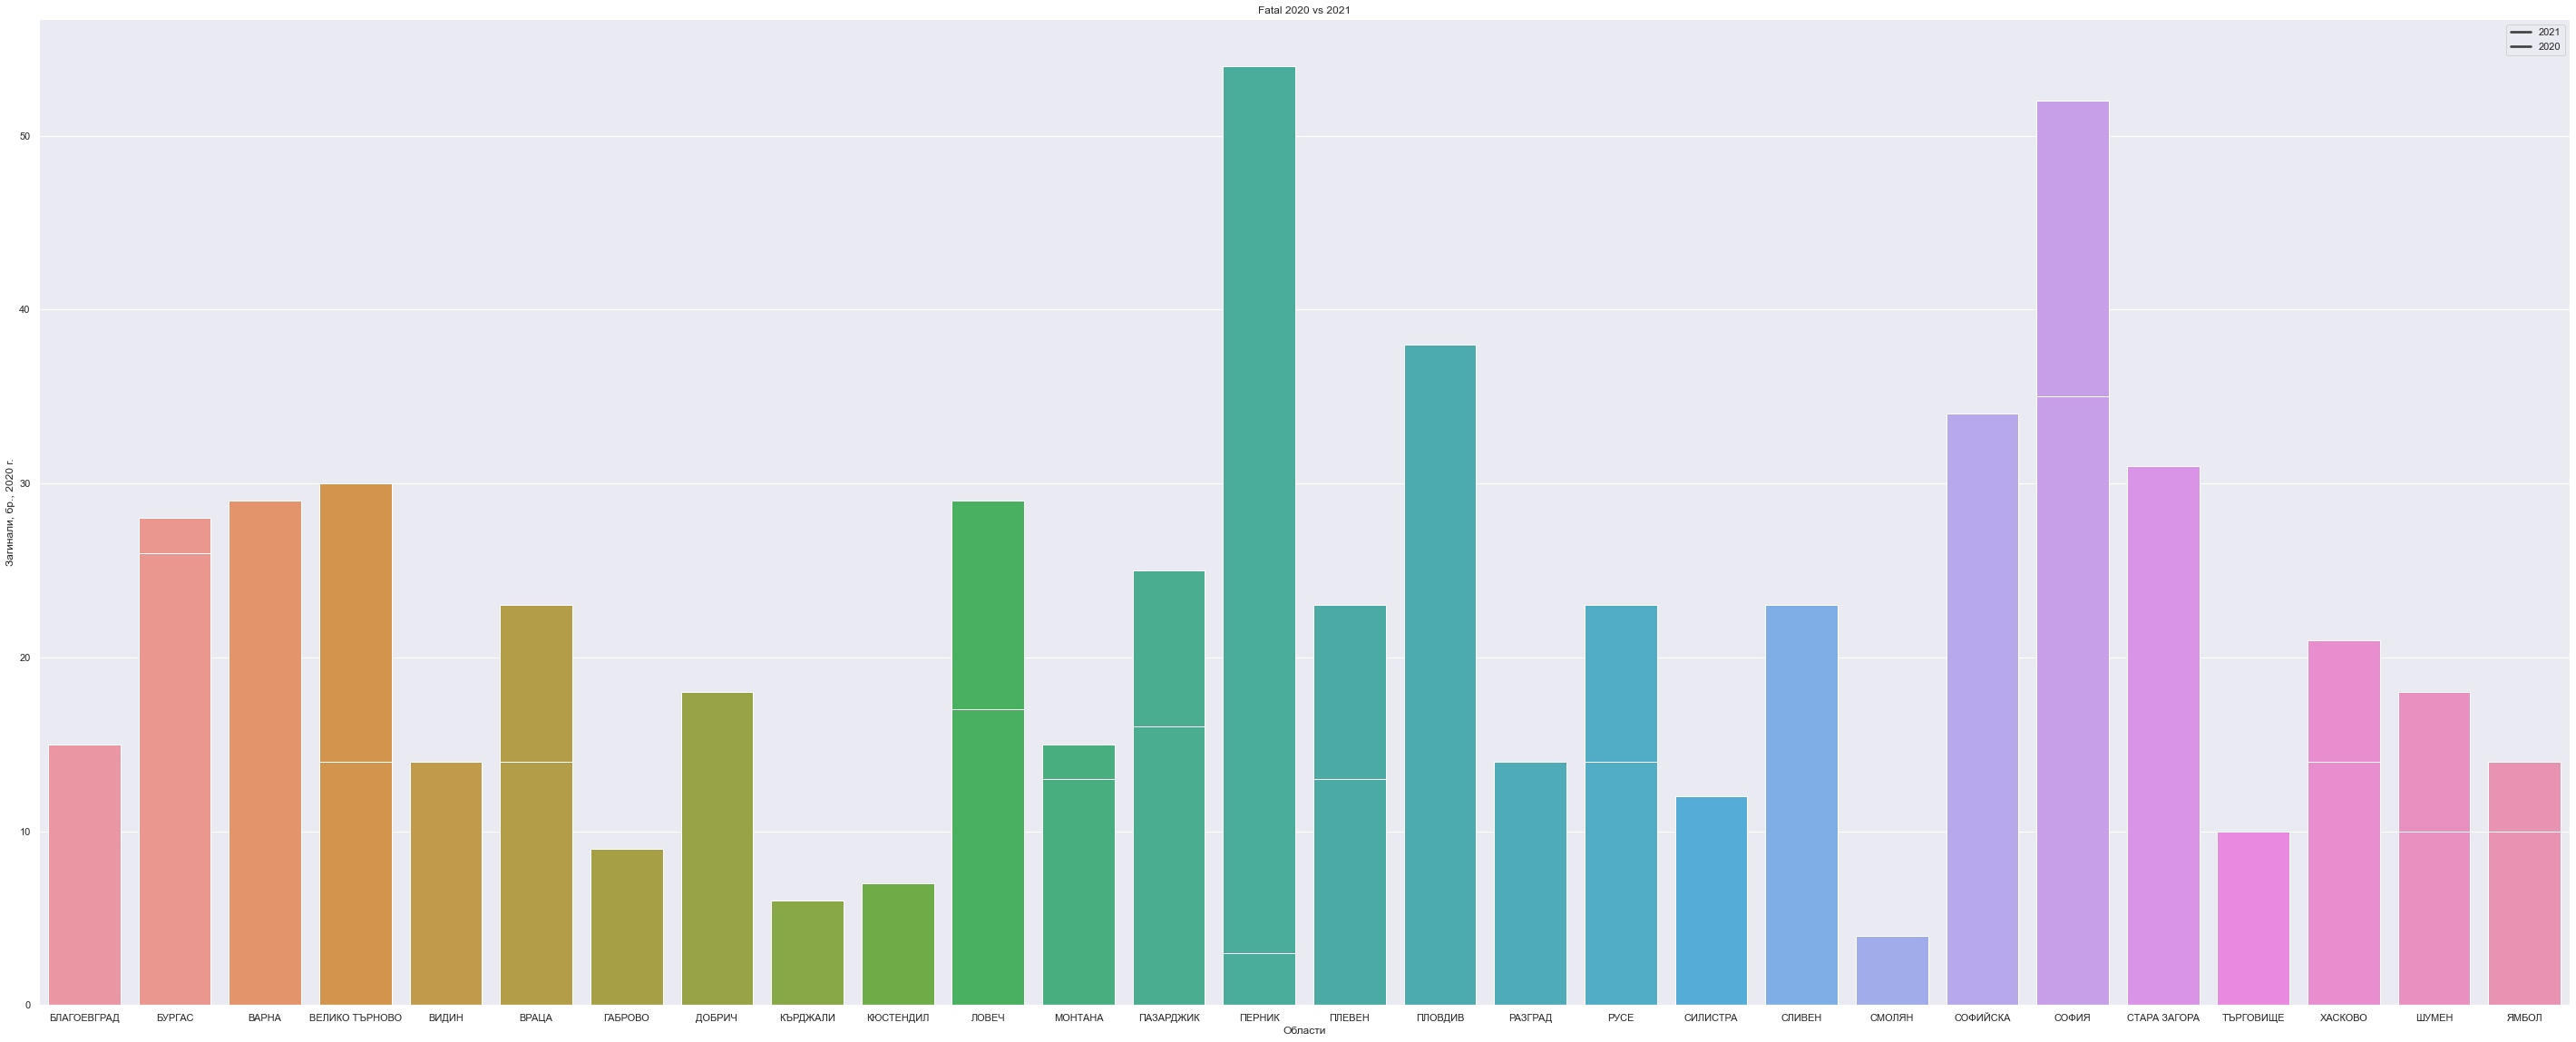

In [5]:
#Create bar charts to visualize data
sns.set(rc={'figure.figsize':(50,20)})
cols = ['Ранени, бр., 2021 г.', 'Загинали, бр., 2021 г.', 'Ранени, бр., 2020 г.', 'Загинали, бр., 2020 г.']

#Create visuals for injuries 
sns.barplot(data = df.loc[:27], x = 'Области', y = cols[0])
sns.barplot(data = df.loc[:27], x = 'Области', y = cols[2]).set(title = "Injured 2020 vs 2021")
plt.legend(labels=["2021", "2020"])
plt.show()

sns.barplot(data = df.loc[:27], x = 'Области', y = cols[1])
sns.barplot(data = df.loc[:27], x = 'Области', y = cols[3]).set(title = "Fatal 2020 vs 2021")
plt.legend(labels = ['2021', '2020'])
plt.show()

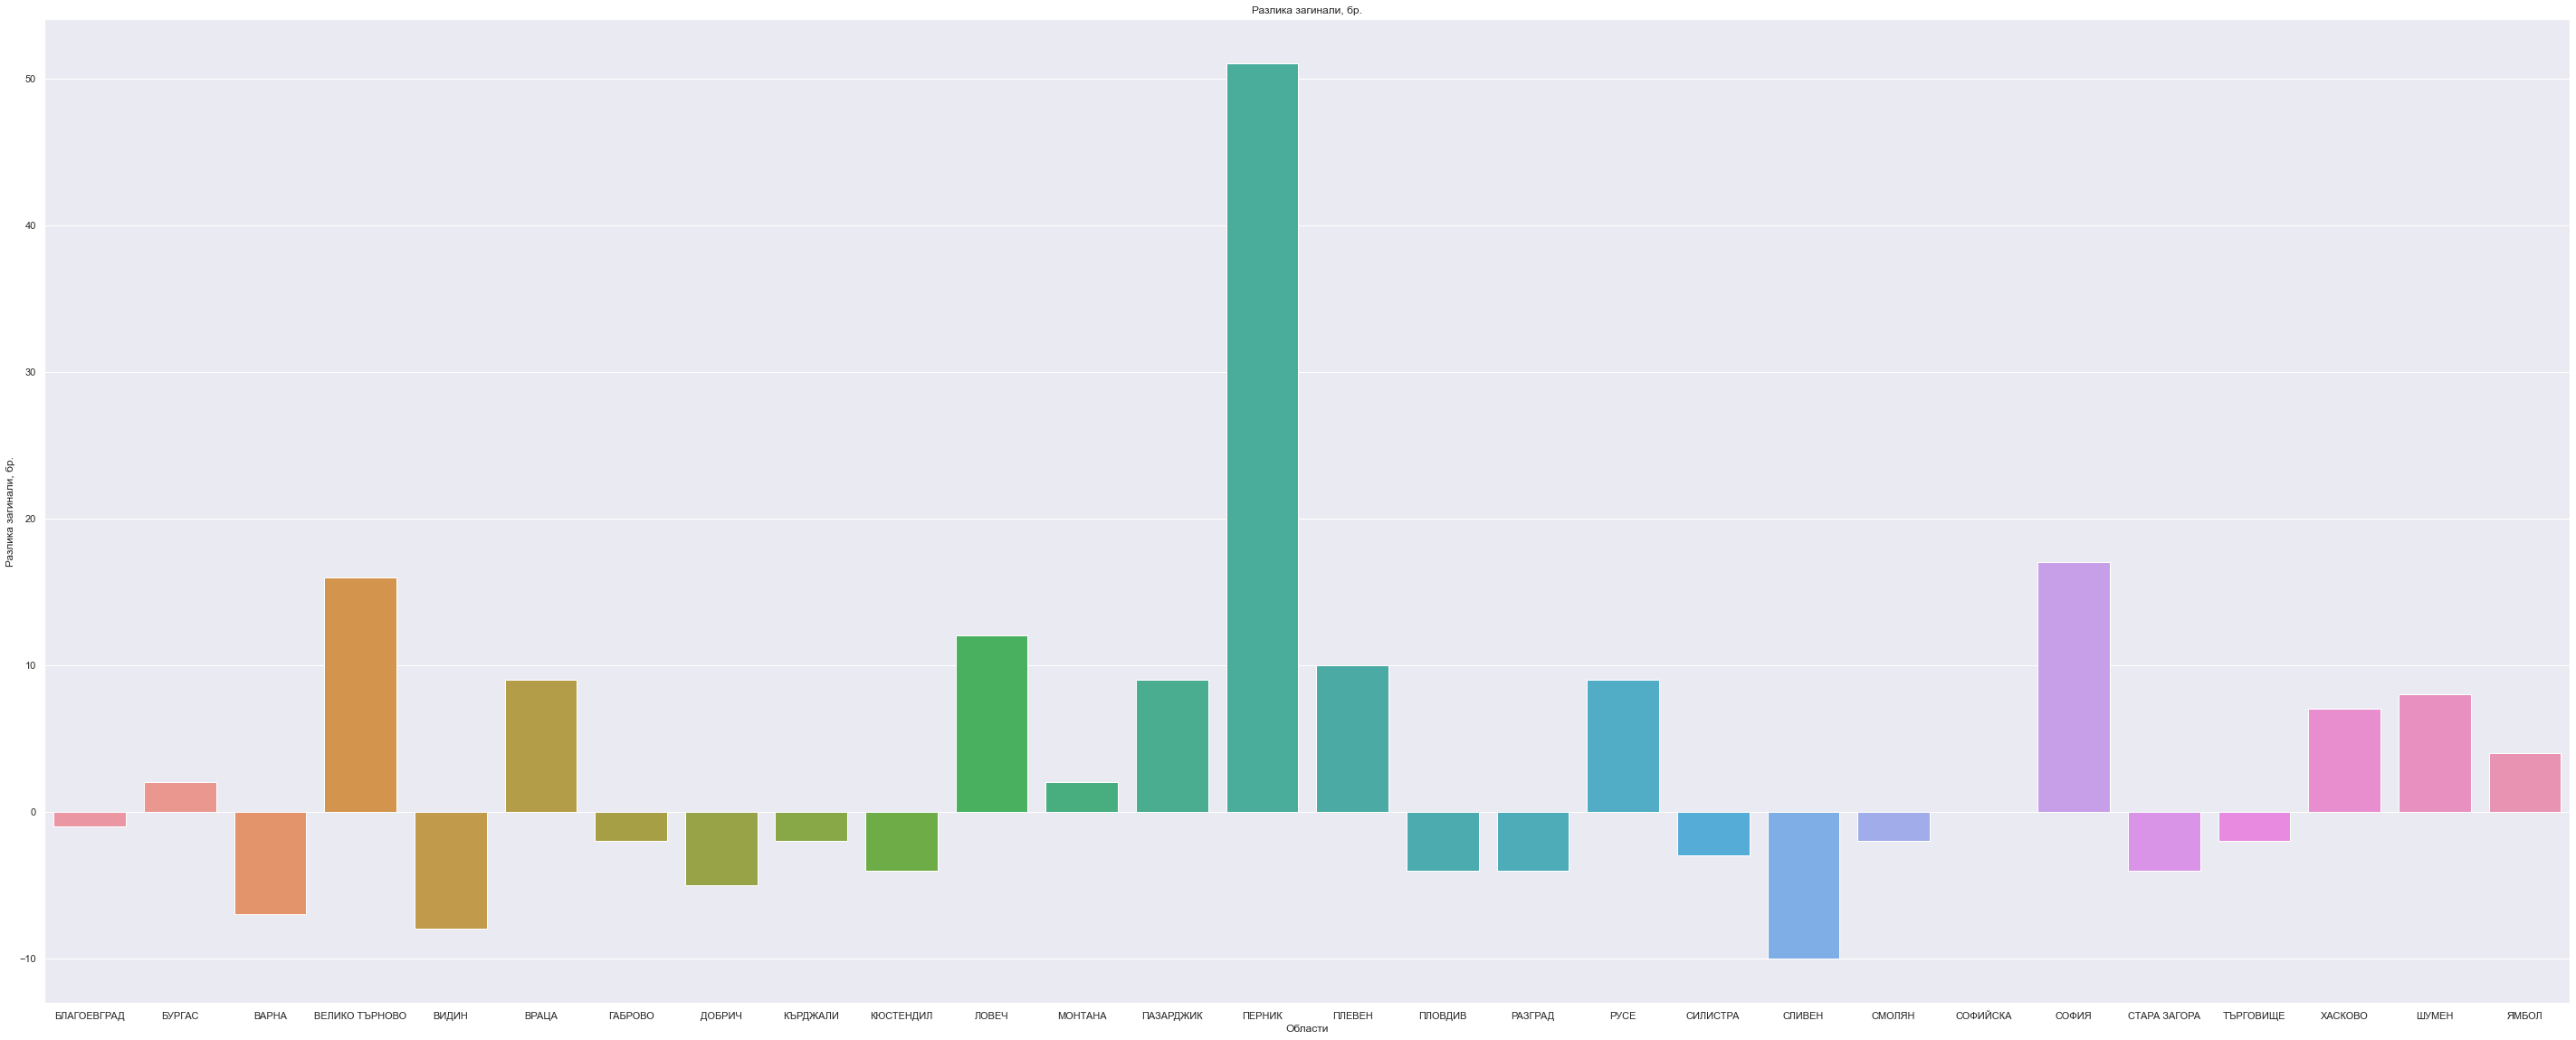

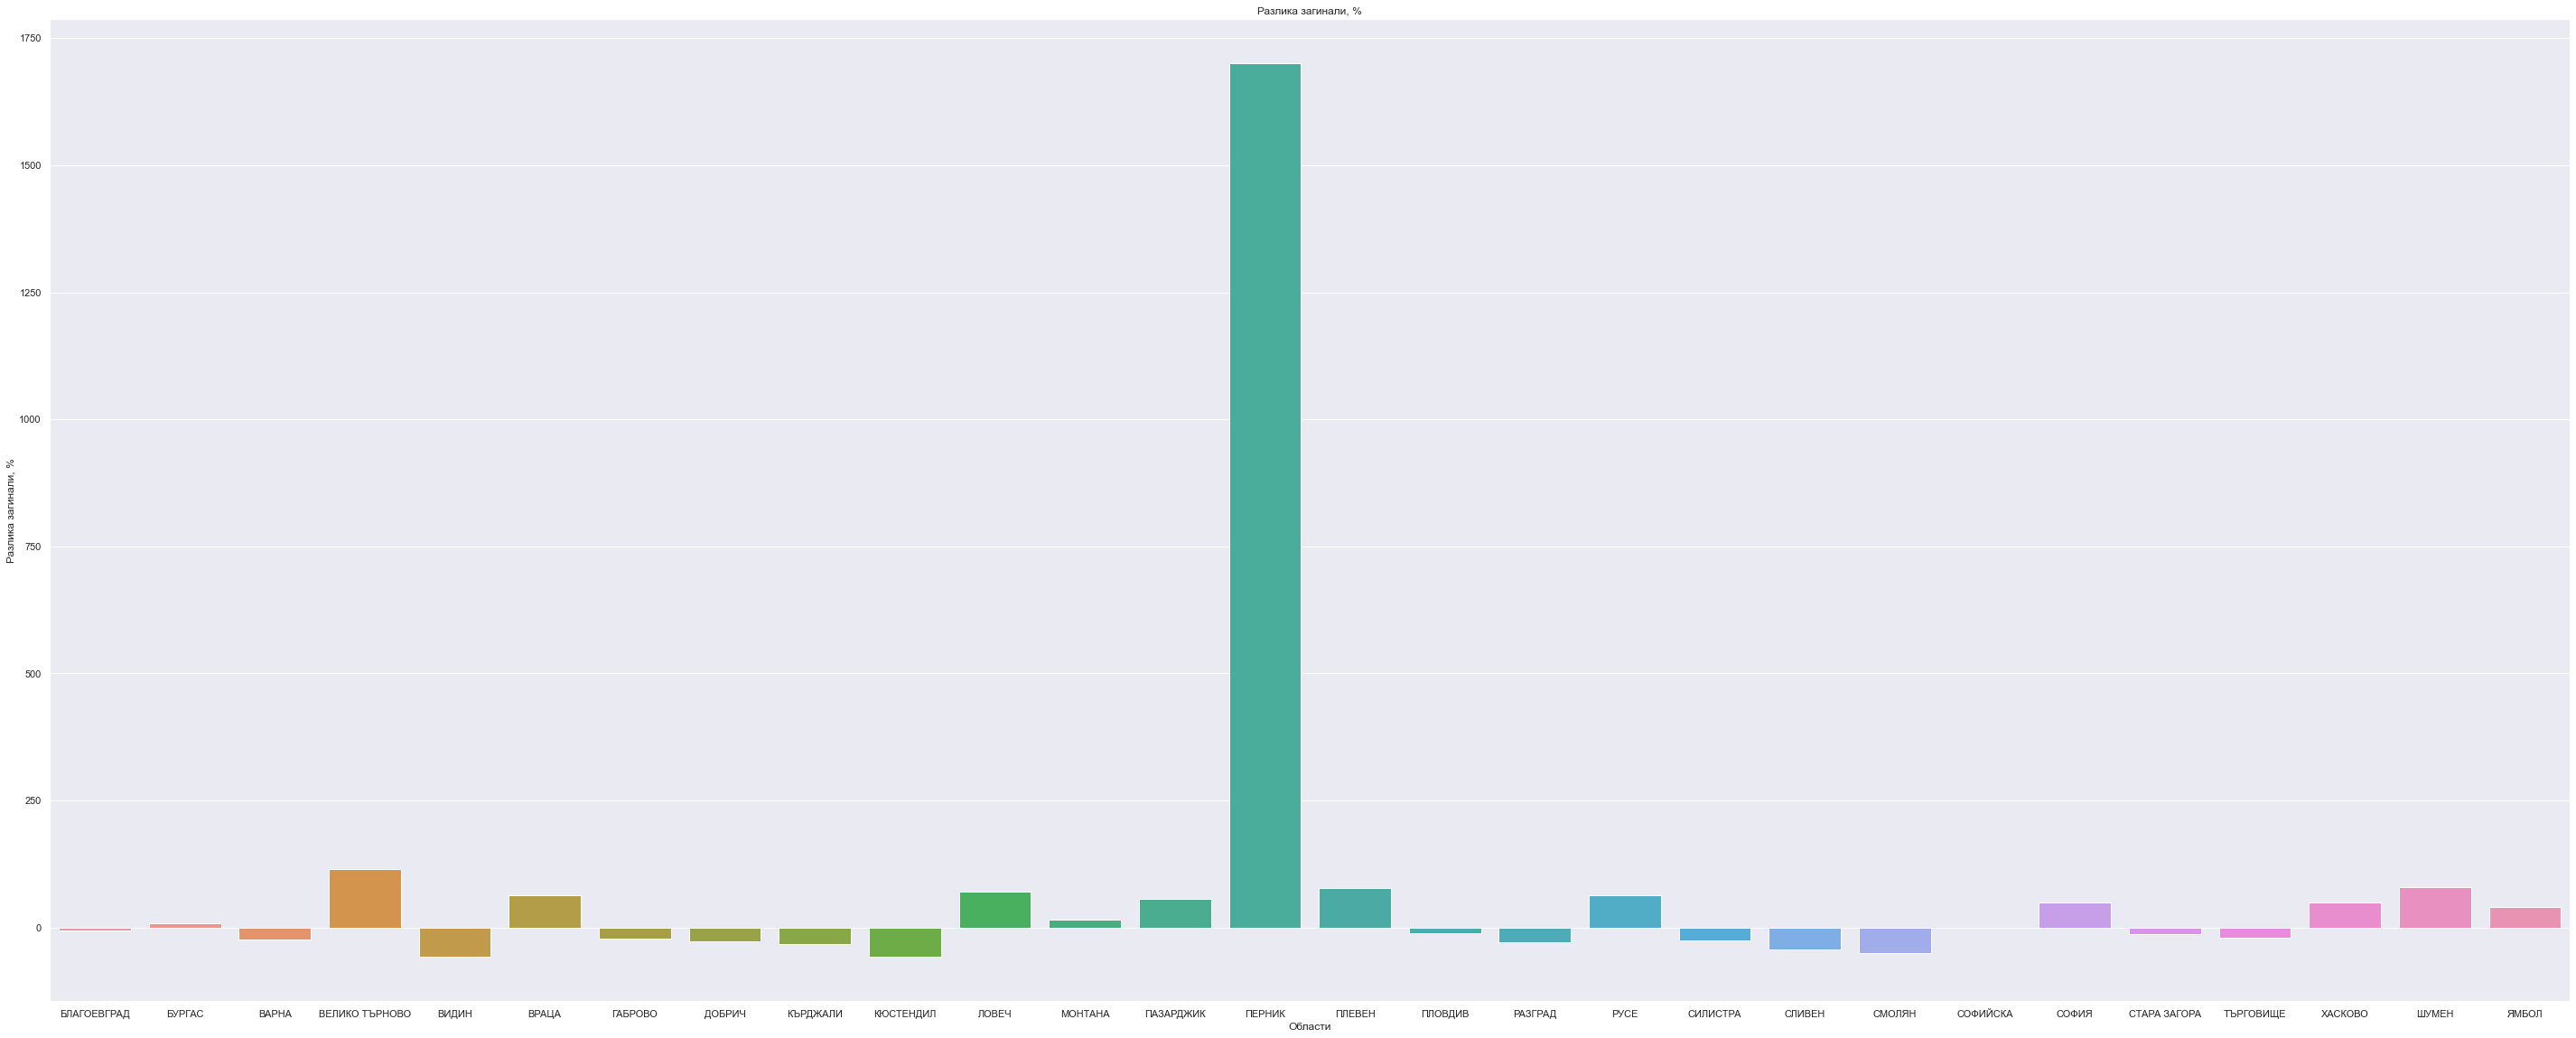

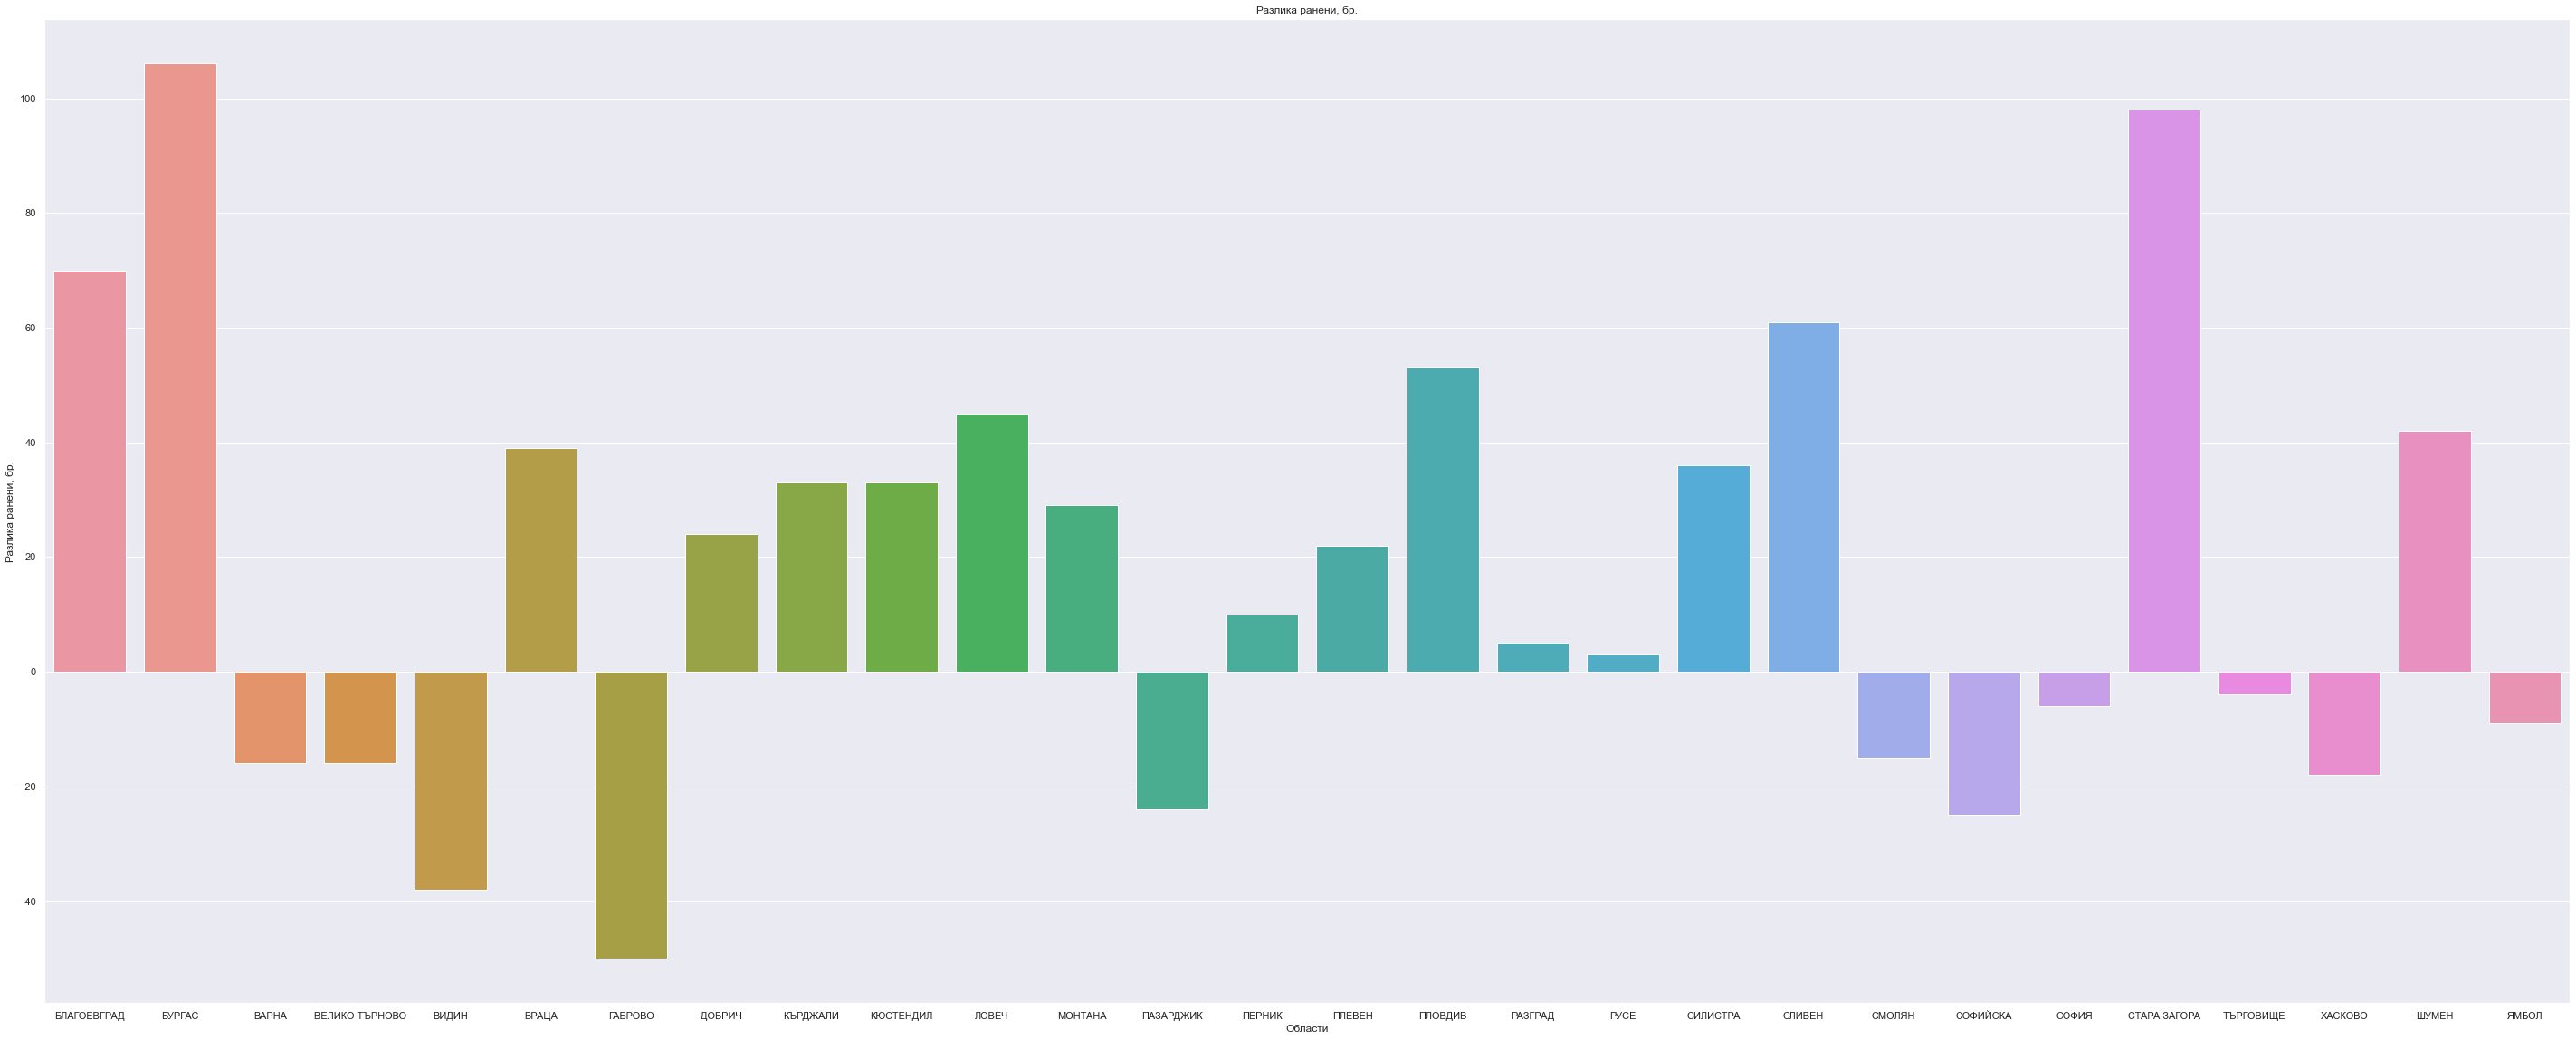

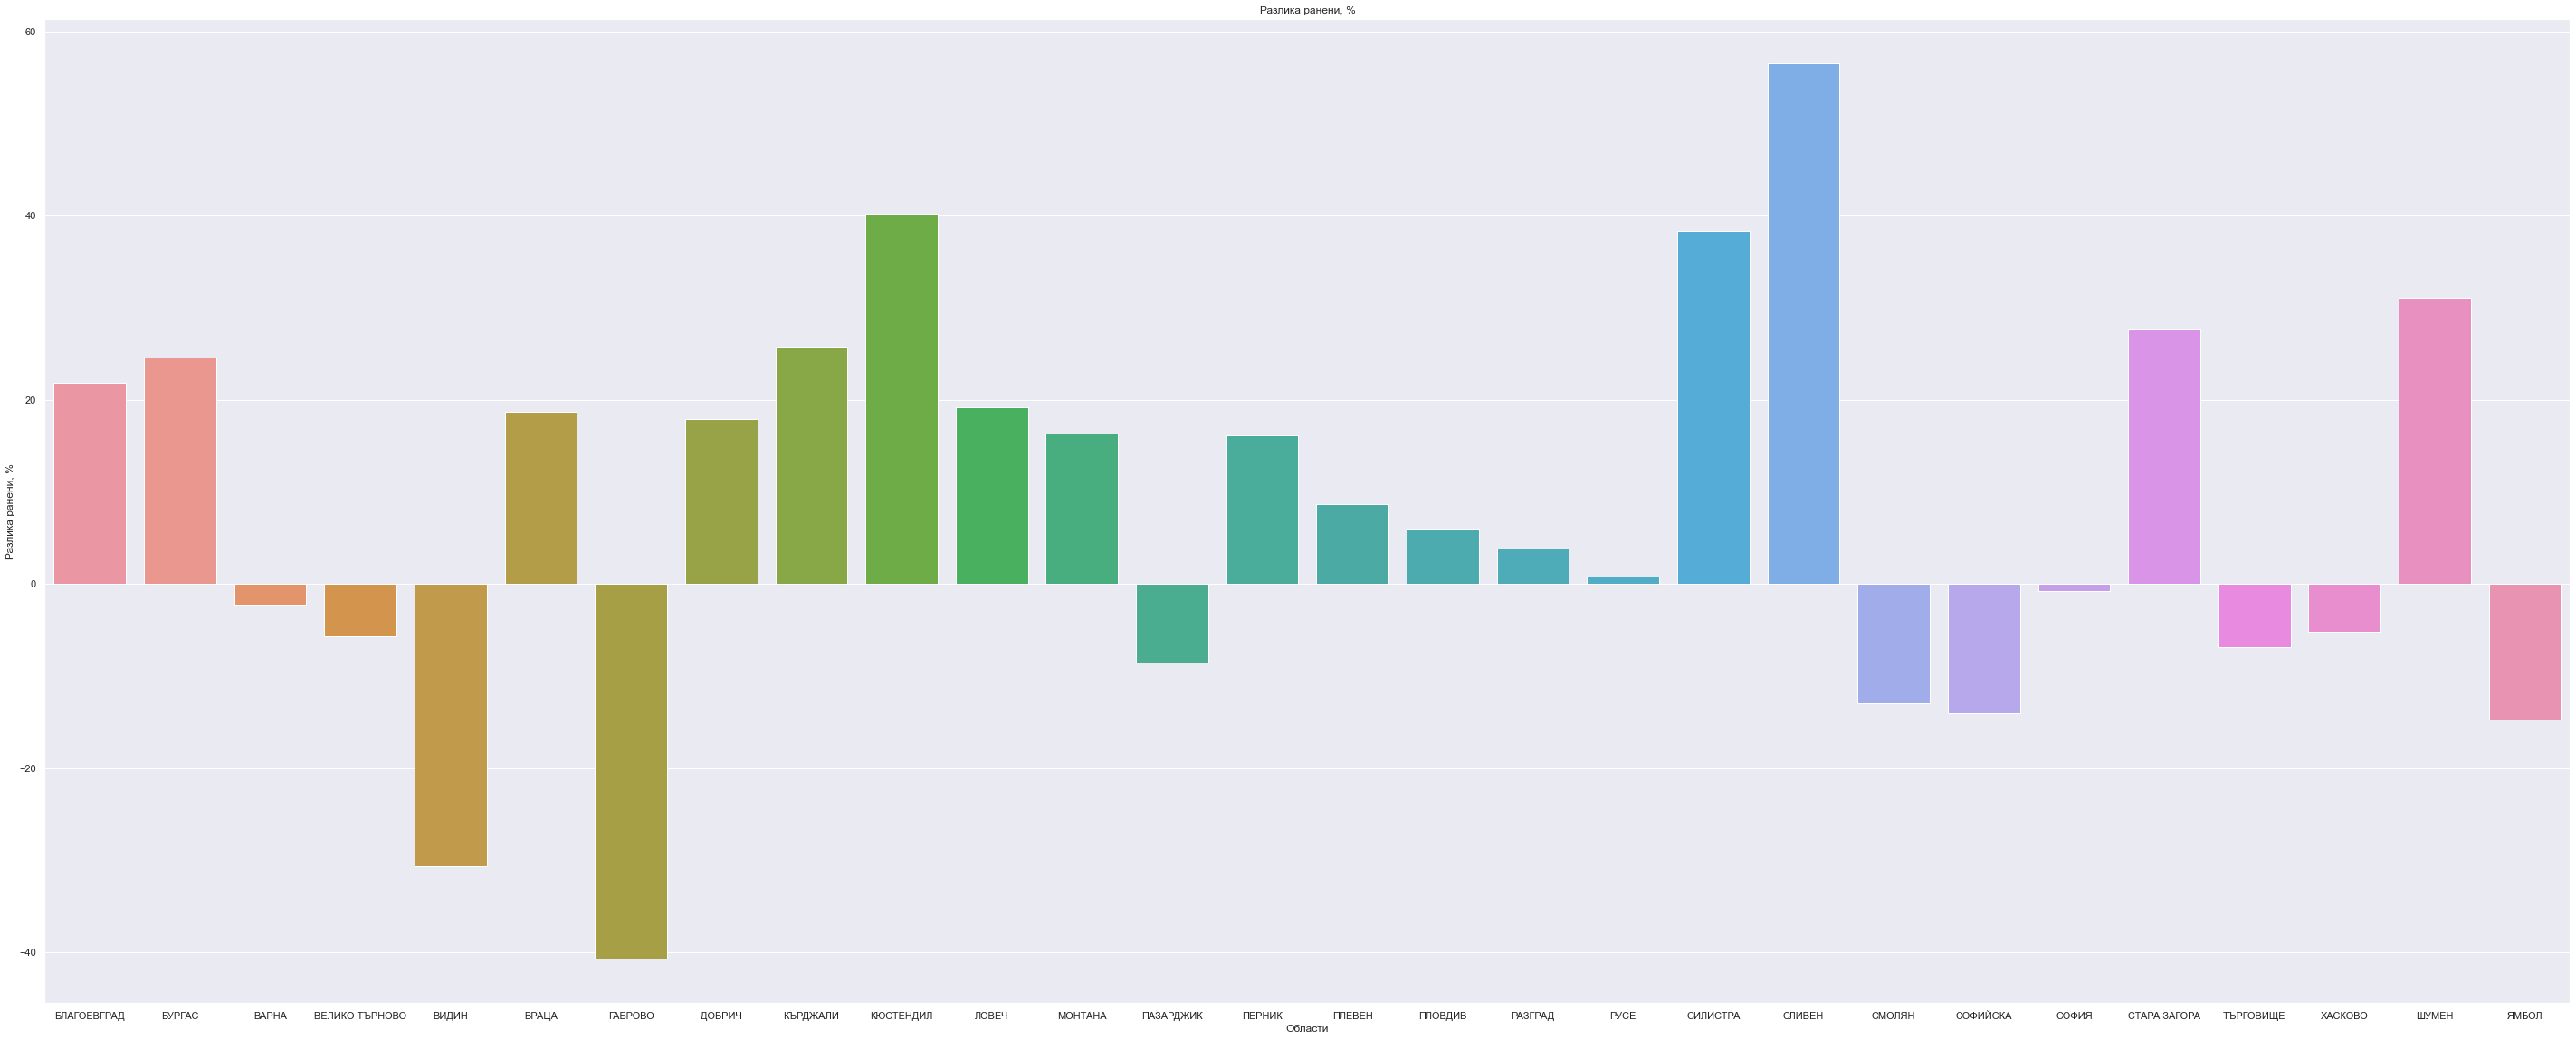

In [6]:
#Bar graph total difference of deaths
columns = ['Разлика загинали, бр.', 'Разлика загинали, %', 'Разлика ранени, бр.', 'Разлика ранени, %']
for col in columns: 
    sns.barplot(data = df.loc[:27], x = 'Области', y = col).set_title(col)
    plt.show()

In [7]:
df.head()

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %"
0,БЛАГОЕВГРАД,274,14,390,249,15,320,25,10.04,-1,-6.67,70,21.88
1,БУРГАС,396,28,538,367,26,432,29,7.90,2,7.69,106,24.54
2,ВАРНА,550,22,686,569,29,702,-19,-3.34,-7,-24.14,-16,-2.28
3,ВЕЛИКО ТЪРНОВО,218,30,265,218,14,281,0,0.00,16,114.29,-16,-5.69
4,ВИДИН,71,6,86,95,14,124,-24,-25.26,-8,-57.14,-38,-30.65


In [8]:
#TODO
# 1) Fix visuals
# 2) Do test hypothesis to see significant difference between years for a given region
# 3) Plot in a world map the number of deaths/injuries and add visual marker when statistical significance occurs

In [9]:
app_2021 = []
app_2020 = []
for col in df.columns:
    if '2021' in col:
        app_2021.append(col)
    elif '2020' in col:
        app_2020.append(col)
    else: 
        app_2021.append(col)
app_2021

['Области',
 'ПТП, бр., 2021 г.',
 'Загинали, бр., 2021 г.',
 'Ранени, бр., 2021 г.',
 'Разлика ПТП, бр.',
 'Разлика ПТП, %',
 'Разлика загинали, бр.',
 'Разлика загинали, %',
 'Разлика ранени, бр.',
 'Разлика ранени, %']

In [10]:
app_2020

['ПТП, бр., 2020 г.', 'Загинали, бр., 2020 г.', 'Ранени, бр., 2020 г.']

In [11]:
df1 = df.drop(app_2020, axis = 1)

In [12]:
df1

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %"
0,БЛАГОЕВГРАД,274,14,390,25,10.04,-1,-6.67,70,21.88
1,БУРГАС,396,28,538,29,7.90,2,7.69,106,24.54
2,ВАРНА,550,22,686,-19,-3.34,-7,-24.14,-16,-2.28
3,ВЕЛИКО ТЪРНОВО,218,30,265,0,0.00,16,114.29,-16,-5.69
4,ВИДИН,71,6,86,-24,-25.26,-8,-57.14,-38,-30.65
5,ВРАЦА,183,23,248,28,18.06,9,64.29,39,18.66
6,ГАБРОВО,71,7,73,-36,-33.64,-2,-22.22,-50,-40.65
7,ДОБРИЧ,123,13,158,16,14.95,-5,-27.78,24,17.91
8,КЪРДЖАЛИ,129,4,161,30,30.30,-2,-33.33,33,25.78
9,КЮСТЕНДИЛ,91,3,115,17,22.97,-4,-57.14,33,40.24


In [13]:
df2 = df.drop(app_2021, axis = 1)

In [14]:
df2

,"ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г."
0,249,15,320
1,367,26,432
2,569,29,702
3,218,14,281
4,95,14,124
5,155,14,209
6,107,9,123
7,107,18,134
8,99,6,128
9,74,7,82


In [15]:
df_viz = pd.concat([df1,df2])
df_viz.reset_index(inplace = True)

In [16]:
df_viz.drop('index', axis = 1, inplace=True)

In [17]:
df_viz

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г."
0,БЛАГОЕВГРАД,274.0,14.0,390.0,25.0,10.04,-1.0,-6.67,70.0,21.88,NaN,NaN,NaN
1,БУРГАС,396.0,28.0,538.0,29.0,7.90,2.0,7.69,106.0,24.54,NaN,NaN,NaN
2,ВАРНА,550.0,22.0,686.0,-19.0,-3.34,-7.0,-24.14,-16.0,-2.28,NaN,NaN,NaN
3,ВЕЛИКО ТЪРНОВО,218.0,30.0,265.0,0.0,0.00,16.0,114.29,-16.0,-5.69,NaN,NaN,NaN
4,ВИДИН,71.0,6.0,86.0,-24.0,-25.26,-8.0,-57.14,-38.0,-30.65,NaN,NaN,NaN
5,ВРАЦА,183.0,23.0,248.0,28.0,18.06,9.0,64.29,39.0,18.66,NaN,NaN,NaN
6,ГАБРОВО,71.0,7.0,73.0,-36.0,-33.64,-2.0,-22.22,-50.0,-40.65,NaN,NaN,NaN
7,ДОБРИЧ,123.0,13.0,158.0,16.0,14.95,-5.0,-27.78,24.0,17.91,NaN,NaN,NaN
8,КЪРДЖАЛИ,129.0,4.0,161.0,30.0,30.30,-2.0,-33.33,33.0,25.78,NaN,NaN,NaN
9,КЮСТЕНДИЛ,91.0,3.0,115.0,17.0,22.97,-4.0,-57.14,33.0,40.24,NaN,NaN,NaN


In [36]:
df_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Области                 29 non-null     object 
 1   ПТП, бр., 2021 г.       29 non-null     float64
 2   Загинали, бр., 2021 г.  29 non-null     float64
 3   Ранени, бр., 2021 г.    29 non-null     float64
 4   Разлика ПТП, бр.        29 non-null     float64
 5   Разлика ПТП, %          28 non-null     float64
 6   Разлика загинали, бр.   29 non-null     float64
 7   Разлика загинали, %     28 non-null     float64
 8   Разлика ранени, бр.     29 non-null     float64
 9   Разлика ранени, %       28 non-null     float64
 10  ПТП, бр., 2020 г.       29 non-null     float64
 11  Загинали, бр., 2020 г.  29 non-null     float64
 12  Ранени, бр., 2020 г.    29 non-null     float64
 13  Year                    29 non-null     object 
dtypes: float64(12), object(2)
memory usage: 6.5+

In [37]:
df_viz['Year'] = df_viz['Области']
for index, row in df_viz.iterrows():
    print(row['ПТП, бр., 2021 г.'])
    if row['ПТП, бр., 2021 г.'] != float:
        print('here')
        df_viz['Year'].iloc[index] = '2020'

274.0
here
396.0
here
550.0
here
218.0
here
71.0
here
183.0
here
71.0
here
123.0
here
129.0
here
91.0
here
205.0
here
161.0
here
210.0
here
62.0
here
226.0
here
731.0
here
106.0
here
300.0
here
98.0
here
137.0
here
78.0
here
155.0
here
649.0
here
358.0
here
44.0
here
260.0
here
147.0
here
47.0
here
6080.0
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here
nan
here


C:\Users\Kamen\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [38]:
df_viz

,Области,"ПТП, бр., 2021 г.","Загинали, бр., 2021 г.","Ранени, бр., 2021 г.","Разлика ПТП, бр.","Разлика ПТП, %","Разлика загинали, бр.","Разлика загинали, %","Разлика ранени, бр.","Разлика ранени, %","ПТП, бр., 2020 г.","Загинали, бр., 2020 г.","Ранени, бр., 2020 г.",Year
0,БЛАГОЕВГРАД,274.0,14.0,390.0,25.0,10.04,-1.0,-6.67,70.0,21.88,NaN,NaN,NaN,2020
1,БУРГАС,396.0,28.0,538.0,29.0,7.90,2.0,7.69,106.0,24.54,NaN,NaN,NaN,2020
2,ВАРНА,550.0,22.0,686.0,-19.0,-3.34,-7.0,-24.14,-16.0,-2.28,NaN,NaN,NaN,2020
3,ВЕЛИКО ТЪРНОВО,218.0,30.0,265.0,0.0,0.00,16.0,114.29,-16.0,-5.69,NaN,NaN,NaN,2020
4,ВИДИН,71.0,6.0,86.0,-24.0,-25.26,-8.0,-57.14,-38.0,-30.65,NaN,NaN,NaN,2020
5,ВРАЦА,183.0,23.0,248.0,28.0,18.06,9.0,64.29,39.0,18.66,NaN,NaN,NaN,2020
6,ГАБРОВО,71.0,7.0,73.0,-36.0,-33.64,-2.0,-22.22,-50.0,-40.65,NaN,NaN,NaN,2020
7,ДОБРИЧ,123.0,13.0,158.0,16.0,14.95,-5.0,-27.78,24.0,17.91,NaN,NaN,NaN,2020
8,КЪРДЖАЛИ,129.0,4.0,161.0,30.0,30.30,-2.0,-33.33,33.0,25.78,NaN,NaN,NaN,2020
9,КЮСТЕНДИЛ,91.0,3.0,115.0,17.0,22.97,-4.0,-57.14,33.0,40.24,NaN,NaN,NaN,2020
